<h2 align='center'> PROJECT 1 </h2>

In [1]:
# importing essential libraries and modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

In [2]:
# load training set 
train = pd.read_csv("technocolabs training set.csv")
train.shape

C:\Users\jemim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3,4,5,6,7,14,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(218586, 21)

In [3]:
train.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0.0,0.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0.0,1.0,...,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218586 entries, 0 to 218585
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167881 non-null  object 
 1   session_position                 167880 non-null  float64
 2   session_length                   167880 non-null  float64
 3   track_id_clean                   167880 non-null  object 
 4   skip_1                           167880 non-null  object 
 5   skip_2                           167880 non-null  object 
 6   skip_3                           167880 non-null  object 
 7   not_skipped                      167880 non-null  object 
 8   context_switch                   167880 non-null  float64
 9   no_pause_before_play             167880 non-null  float64
 10  short_pause_before_play          167880 non-null  float64
 11  long_pause_before_play           167880 non-null  float64
 12  hi

In [5]:
train.describe()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [6]:
train.describe(include=['O'])

,session_id,track_id_clean,skip_1,skip_2,skip_3,not_skipped,hist_user_behavior_is_shuffle,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
count,167881,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880,167880
unique,10001,50704,2,2,2,2,2,18,2,6,9,7
top,0_0d4ac0cc-a8dc-4c4d-81d8-2d49d3917b4f,t_bacf06d3-9185-4183-84ea-ff0db51475ce,False,True,True,False,False,7/15/2018,True,user_collection,fwdbtn,fwdbtn
freq,20,1427,97118,86824,108850,111996,116050,119639,136053,67430,79912,81389


In [7]:
train.drop_duplicates(inplace=True)
train.dropna(inplace=True)
train.shape

(167880, 21)

In [8]:
# changing the type of columns 
for colname in ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']:
    train[colname] = train[colname].astype(int, copy=False)

In [9]:
train['skip'] = train['not_skipped'].replace({ 0 : 1, 1 : 0 })

In [10]:
train['skip'].value_counts()

1    111996
0     55884
Name: skip, dtype: int64

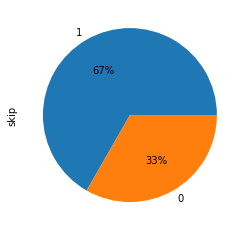

In [11]:
train['skip'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [12]:
### Analysing categorical data

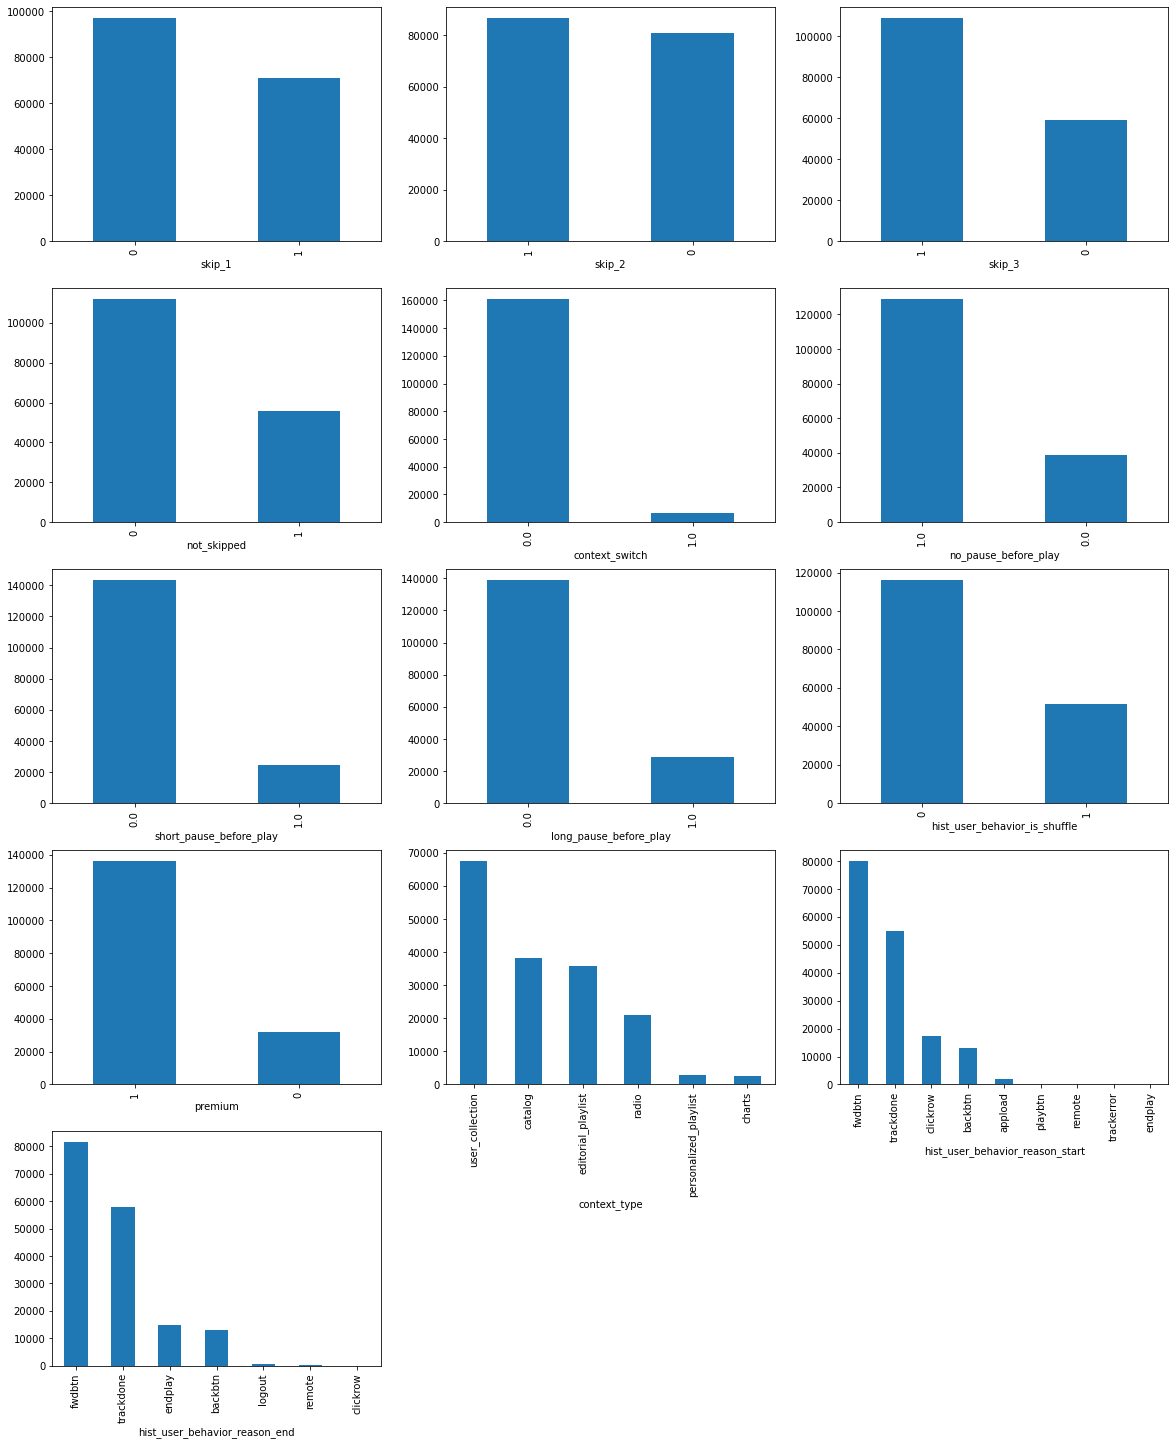

In [13]:
col = ['skip_1','skip_2','skip_3',
       'not_skipped','context_switch','no_pause_before_play',
       'short_pause_before_play','long_pause_before_play','hist_user_behavior_is_shuffle',
       'premium','context_type','hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end']

plt.figure(figsize=(20,25))
n = 1
for colname in col:
    plt.subplot(5,3,n)
    train[colname].value_counts().plot(kind='bar')
    plt.xlabel(colname)
    n +=1

In [14]:
# creating copy of the train data 
df = train.copy()
df.shape

(167880, 22)

In [15]:
#df.date = df.date.apply(pd.to_datetime)
#df.info()

In [16]:
### Dropping Irrelevent columns

In [17]:
df = df.drop(columns=['skip_1','skip_2','skip_3','not_skipped','date'])
df.shape

(167880, 17)

In [18]:
df.head()

,session_id,session_position,session_length,track_id_clean,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skip
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,1,editorial_playlist,trackdone,trackdone,0


In [19]:
### One-hot Encoding on Train data

In [20]:
df1 = df.drop(['session_id', 'track_id_clean'], axis=1)
df1.shape

(167880, 15)

In [21]:
dummy_train = pd.get_dummies(df1)
dummy_train.shape

(167880, 34)

In [22]:
dummy_train.head()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
1,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
2,3.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
3,4.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
4,5.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1


In [23]:
## Analysing Track Features 

In [24]:
track = pd.read_csv("track_feats.csv")
track.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [25]:
track.shape

(316702, 30)

In [26]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316702 entries, 0 to 316701
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   track_id                316702 non-null  object 
 1   duration                316702 non-null  float64
 2   release_year            316702 non-null  float64
 3   us_popularity_estimate  316702 non-null  float64
 4   acousticness            316702 non-null  float64
 5   beat_strength           316702 non-null  float64
 6   bounciness              316702 non-null  float64
 7   danceability            316702 non-null  float64
 8   dyn_range_mean          316702 non-null  float64
 9   energy                  316702 non-null  float64
 10  flatness                316702 non-null  float64
 11  instrumentalness        316702 non-null  float64
 12  key                     316702 non-null  float64
 13  liveness                316702 non-null  float64
 14  loudness            

In [27]:
track.duplicated().sum()

0

In [28]:
track.isna().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
is_major                  0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

In [29]:
### Statistical summary of track features

In [30]:
track.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,...,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000
mean,0.000923,0.883444,-0.022242,0.281541,0.477372,0.497480,0.589497,-0.001272,0.632731,0.993752,...,0.556604,0.488560,0.005364,-0.006707,-0.004315,0.003672,0.002717,-0.003631,0.005902,0.000838
std,1.005991,0.165386,1.014102,0.301165,0.162313,0.188032,0.173186,1.001798,0.228166,0.048357,...,0.063584,0.256182,1.000247,1.002609,1.003723,1.001550,1.001636,1.003240,1.002118,1.002930
min,-2.359677,0.000000,-6.207444,0.000000,0.000000,0.000000,0.000000,-3.247292,0.000000,0.000000,...,0.000000,0.000000,-2.086612,-4.441997,-3.843906,-2.349572,-2.654358,-6.287599,-1.701727,-2.881315
25%,-0.524978,0.852941,-0.169543,0.024083,0.355427,0.349182,0.475606,-0.773883,0.484491,0.971236,...,0.571429,0.281569,-0.834468,-0.497206,-0.627210,-0.762369,-0.799895,-0.538955,-0.728965,-0.619601
50%,-0.105378,0.955882,0.358592,0.156679,0.476761,0.502692,0.603000,-0.095655,0.660723,1.001626,...,0.571429,0.480178,0.083995,0.224900,0.275068,0.070669,-0.238287,0.149411,-0.281970,0.141966
75%,0.375977,0.985294,0.584683,0.485536,0.594337,0.643910,0.720020,0.644239,0.815253,1.025645,...,0.571429,0.691242,0.831649,0.656089,0.715054,0.544088,0.837206,0.727947,0.521096,0.568692
max,19.108514,1.000000,0.715584,0.995796,0.987369,0.975535,0.995690,8.727326,0.999984,1.131413,...,0.714286,0.999990,2.857353,2.315441,2.176667,3.340167,2.442389,2.147237,3.135206,3.441050


In [31]:
# summary for object columns:
track.describe(include='O')

,track_id
count,316702
unique,316702
top,t_6347b9d9-98fb-4dca-8204-3944988b232b
freq,1


In [35]:
### EDA 

In [42]:
# extracting columns other than float ie, int and object for eda :
track[[c for c in track.columns if track[c].dtype != 'float64']].head()

,track_id,is_major
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,1
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,1
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,1
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,1


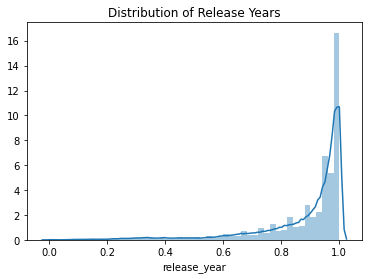

In [43]:
# distribution of release years : 
sns.distplot(track.release_year)
plt.title("Distribution of Release Years");

In [44]:
track['key'].unique()

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

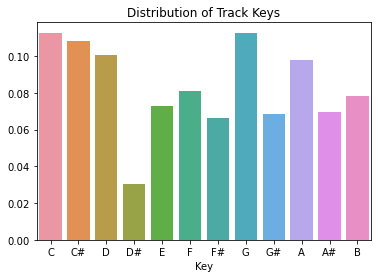

In [45]:
# we have unique values in keys columns: we have specific Pitch class for these keys(just naming keys acc. to their pitch class)
keys = track.key.value_counts().sort_index()
sns.barplot(
    x=[ "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],
    y=keys.values/keys.sum()
)
plt.title("Distribution of Track Keys")
plt.xlabel("Key");

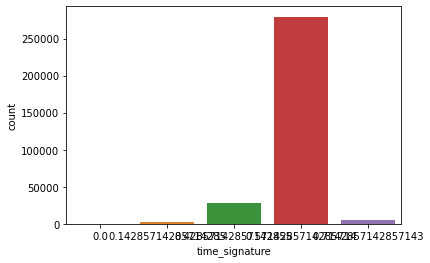

In [46]:
sns.countplot(track.time_signature)

In [47]:
### Analysing numerical columns

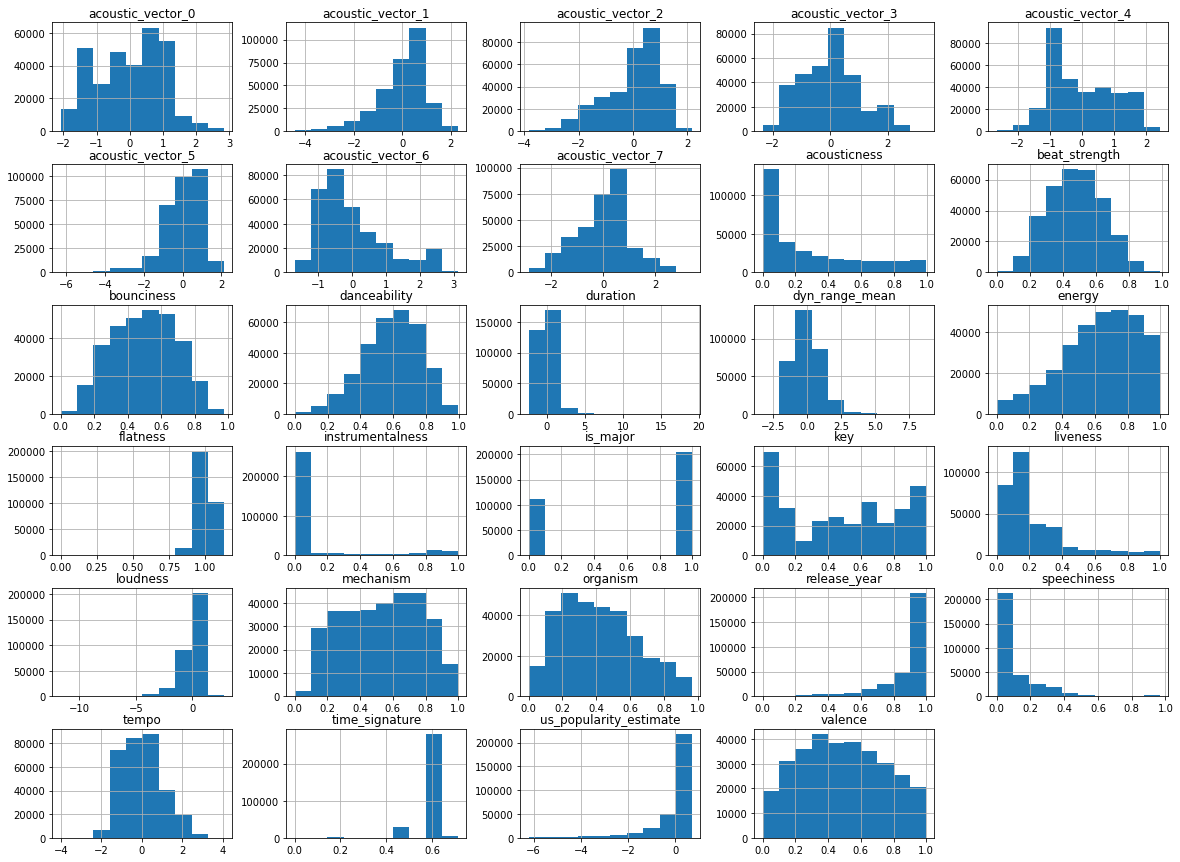

In [48]:
track.hist(figsize=(20,15));

In [50]:
### Correlation matrix  

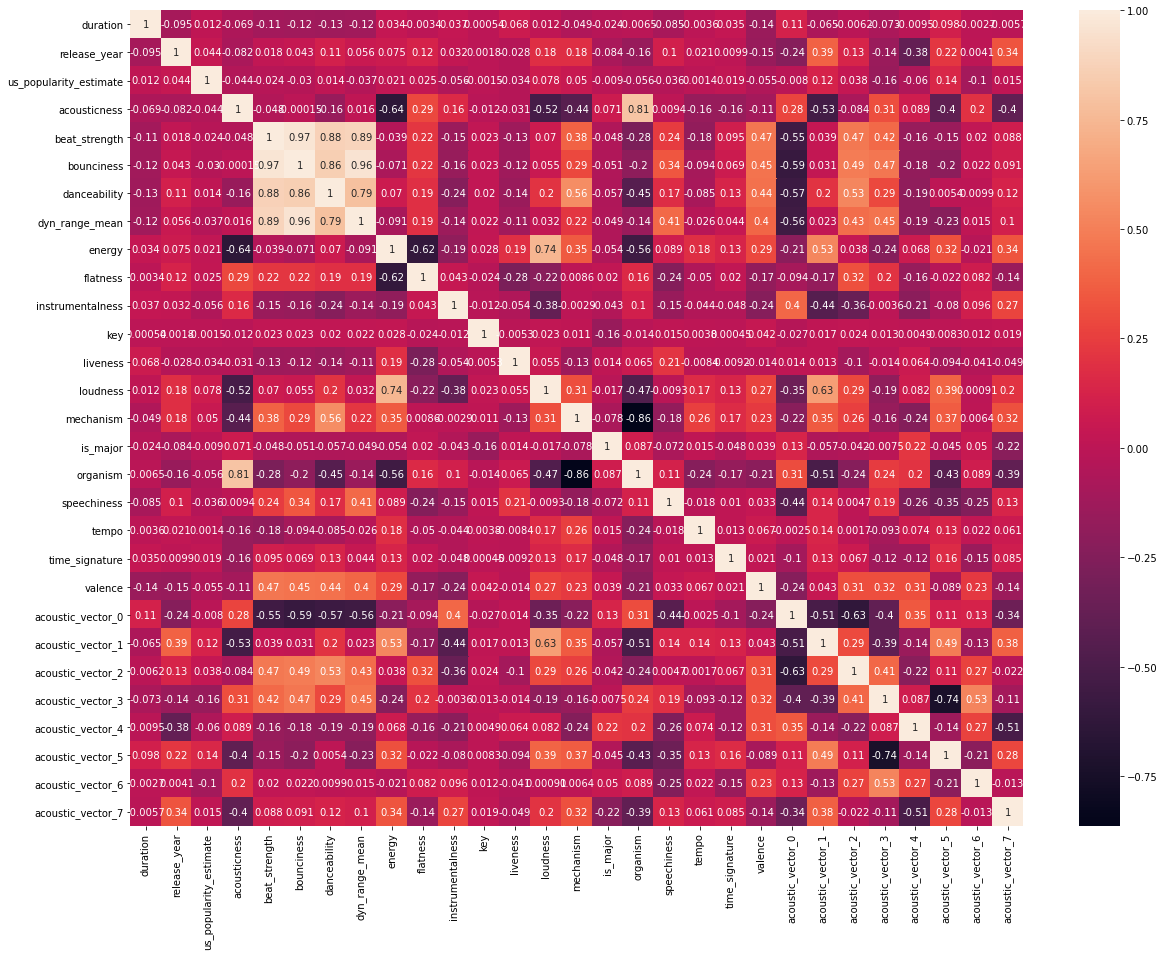

In [52]:
plt.figure(figsize=(20,15))
sns.heatmap(track.corr(), annot=True);

In [53]:
### Merging track and Training Data on the basis of track_id (primary key):

In [54]:
track.shape

(316702, 30)

In [55]:
df.shape

(167880, 17)

In [56]:
df.rename(columns={'track_id_clean': 'track_id'}, inplace=True)

In [57]:
final_train = pd.merge(df, track, on=['track_id'], left_index=True, right_index=False, sort=True)
final_train.shape

(154360, 46)

In [58]:
final_train.sort_values(axis=0, by=['session_id','session_position'], inplace=True)
final_train.reset_index(drop=True,inplace=True)

In [59]:
final_train.head()

,session_id,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0.0,0.0,...,0.571429,0.152255,-1.332878,0.813641,0.440978,0.131989,-0.844142,-0.143796,-0.599983,0.566763
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0.0,1.0,0.0,0.0,0.0,0.0,...,0.571429,0.337152,-1.090160,0.735187,0.773410,-0.065046,-0.971432,0.160804,-0.631676,0.428458
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.571429,0.373862,-1.158831,0.776265,0.534293,-0.084075,-0.758170,0.142758,-0.959950,0.496833
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0.0,1.0,0.0,0.0,0.0,0.0,...,0.571429,0.649420,-1.069886,0.575604,0.685594,-0.055785,-0.997492,0.318548,-0.629268,0.797080
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0.0,1.0,0.0,0.0,0.0,0.0,...,0.571429,0.652921,-1.458160,0.623033,0.359345,0.291053,-0.843922,-0.390072,-1.023939,0.498887


In [60]:
ft = final_train.drop(columns=["session_id","track_id"])
ft = pd.get_dummies(ft, drop_first=True)
ft.shape

(154360, 59)

In [61]:
ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154360 entries, 0 to 154359
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   session_position                            154360 non-null  float64
 1   session_length                              154360 non-null  float64
 2   context_switch                              154360 non-null  float64
 3   no_pause_before_play                        154360 non-null  float64
 4   short_pause_before_play                     154360 non-null  float64
 5   long_pause_before_play                      154360 non-null  float64
 6   hist_user_behavior_n_seekfwd                154360 non-null  float64
 7   hist_user_behavior_n_seekback               154360 non-null  float64
 8   hist_user_behavior_is_shuffle               154360 non-null  int32  
 9   hour_of_day                                 154360 non-null  float64
 

In [62]:
### Modeling with only Training Data 

In [63]:
dummy_train.head(2)

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1
1,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,1,0,0,0,0,0,0,0,1


In [64]:
dummy_train.shape

(167880, 34)

In [65]:
### Train Test Split 

In [66]:
X = dummy_train.drop(columns=["skip"])
y = dummy_train.skip
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=2
)

In [67]:
##### Applying LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))


0.9874910650464618


C:\Users\jemim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
### Standardsing Data

In [70]:
scaler = StandardScaler()
sX_train = scaler.fit_transform(X_train)
sX_val = scaler.transform(X_val)
sX_test = scaler.transform(X_test)


# Applying LOgistic Regression
log = LogisticRegressionCV(
    cv=3
).fit(
    sX_train,
    y_train
)

print("Log Train score: %s" % log.score(sX_train,y_train))
print("Log Val score:   %s" % log.score(sX_val,y_val))
print("Log Test score:  %s" % log.score(sX_test,y_test))

Log Train score: 0.9867650754353471
Log Val score:   0.9863370686124865
Log Test score:  0.9875208482249226


In [71]:
###  Applying Random Forest

In [72]:
rfc = RandomForestClassifier(
    n_estimators=100
).fit(
    X_train,
    y_train
)

print("RFC Train score: %s" % rfc.score(X_train,y_train))
print("RFC Val score:   %s" % rfc.score(X_val,y_val))
print("RFC Test score:  %s" % rfc.score(X_test,y_test))

RFC Train score: 0.9966028498831939
RFC Val score:   0.9869699564424258
RFC Test score:  0.9876697641172266


In [73]:
### Feature selection using Boruta 

In [74]:
!pip install boruta
from boruta import BorutaPy

In [75]:
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(sX_train), np.array(y_train))  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	33
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	25
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	25
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	25
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	25
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	26
Tentative: 	1
Rejected: 	6
I

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=146,
                                          random_state=RandomState(MT19937) at 0x1EC22847640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1EC22847640, verbose=2)

In [76]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
print("Ranking: ",boruta_selector.ranking_)               # check ranking of features
print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True  True  True  True  True False  True False  True
  True False  True False  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 4 1 3 1 1 1 1 1 2 1 6 1 1 5 1 7 1 1 1 1 1]
No. of significant features:  27


In [77]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,session_position,1
30,hist_user_behavior_reason_end_logout,1
29,hist_user_behavior_reason_end_fwdbtn,1
28,hist_user_behavior_reason_end_endplay,1
26,hist_user_behavior_reason_end_backbtn,1
24,hist_user_behavior_reason_start_trackdone,1
23,hist_user_behavior_reason_start_remote,1
21,hist_user_behavior_reason_start_fwdbtn,1
19,hist_user_behavior_reason_start_clickrow,1
18,hist_user_behavior_reason_start_backbtn,1


In [78]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_val = boruta_selector.transform(np.array(X_val))
X_important_test = boruta_selector.transform(np.array(X_test))

In [79]:
### Creating model with important features (selected by boruta)

In [80]:
rf_important = RandomForestClassifier(random_state=1, n_estimators=100, n_jobs = -1)
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [81]:
print("RFC Train score: %s" % rf_important.score(X_important_train, y_train))
print("RFC Val score:   %s" % rf_important.score(X_important_val, y_val))
print("RFC Test score:  %s" % rf_important.score(X_important_test, y_test)) 

RFC Train score: 0.9965935426225999
RFC Val score:   0.9867838129630319
RFC Test score:  0.9876995472956874


In [82]:
### Applying XG Boost

In [83]:
xg = xgb.XGBClassifier()
xg.fit(X_important_train, y_train,
       eval_set=[(X_important_train, y_train),(X_important_val, y_val)],
       early_stopping_rounds=10, verbose=True)

C:\Users\jemim\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44758	validation_1-logloss:0.44812
[1]	validation_0-logloss:0.31236	validation_1-logloss:0.31327
[2]	validation_0-logloss:0.22779	validation_1-logloss:0.22910
[3]	validation_0-logloss:0.17182	validation_1-logloss:0.17336
[4]	validation_0-logloss:0.13359	validation_1-logloss:0.13536
[5]	validation_0-logloss:0.10707	validation_1-logloss:0.10910
[6]	validation_0-logloss:0.08840	validation_1-logloss:0.09069
[7]	validation_0-logloss:0.07526	validation_1-logloss:0.07783
[8]	validation_0-logloss:0.06595	validation_1-logloss:0.06875
[9]	validation_0-logloss:0.05929	validation_1-logloss:0.06231
[10]	validation_0-logloss:0.05456	validation_1-logloss:0.05783
[11]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
print("XGB Train score: %s" % xg.score(X_important_train,y_train))
print("XGB Val score:   %s" % xg.score(X_important_val,y_val))
print("XGB Test score:  %s" % xg.score(X_important_test,y_test))

XGB Train score: 0.9902273763763112
XGB Val score:   0.9883846468858196
XGB Test score:  0.9892780557541101


In [85]:
### Testing  Model on the Data (given by technocolabs) 

In [87]:
# loading test data 
ts1 = pd.read_csv('test_data.csv')
ts2 = pd.read_csv('test_data_20.csv')

test_set = pd.concat([ts1,ts2])
test_set.shape

(202371, 40)

In [88]:
test_set.head(2)

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0008bbc4-6368-4bf2-83d8-d7f5bf8e0df3,0.000000,0.5,t_c7703c28-9da6-41f3-89b7-1a86ff1ee6be,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63_0008bbc4-6368-4bf2-83d8-d7f5bf8e0df3,0.052632,0.5,t_c7703c28-9da6-41f3-89b7-1a86ff1ee6be,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [89]:
test_set['skip'] =  test_set['not_skipped'].replace({ 0 : 1, 1 : 0 })
y_test_data = test_set.skip

In [90]:
t1 = test_set.drop(['skip_1','skip_2','skip', 'skip_3',	'not_skipped', 'session_id', 'track_id_clean','hist_user_behavior_reason_end_appload'], 
              axis=1)
t1.shape

(202371, 33)

In [91]:
#### Loading Validation data

In [93]:
vs1 = pd.read_csv('val_data.csv')
vs2 = pd.read_csv('val_data_20.csv')

val_set = pd.concat([vs1,vs2])
val_set.shape

(203816, 40)

In [94]:
val_set['skip'] =  val_set['not_skipped'].replace({ 0 : 1, 1 : 0 })
y_val_data = val_set.skip

In [95]:
v1 = val_set.drop(['skip_1','skip_2','skip', 'skip_3',	'not_skipped', 'session_id', 'track_id_clean', 'hist_user_behavior_reason_end_appload'],
             axis=1)
v1.shape

(203816, 33)

In [96]:
### Selecting relevent features from Test and Validation set by using Boruta 

In [97]:
X_val_set = boruta_selector.transform(np.array(v1))
X_test_set = boruta_selector.transform(np.array(t1))

In [98]:
### Validation and test score on unseen data

In [99]:
print("XGB Val score:   %s" % xg.score(X_val_set, y_val_data))
print("XGB Test score:  %s" % xg.score(X_test_set, y_test_data))

XGB Val score:   0.9883424265023354
XGB Test score:  0.9886248523750932


In [100]:
print("RF Val score:   %s" % rf_important.score(X_val_set, y_val_data))
print("RF Test score:  %s" % rf_important.score(X_test_set, y_test_data))

RF Val score:   0.9890391333359501
RF Test score:  0.9891091114833647


In [101]:
### Creating Model with final data (merged data-- ie track + train data)

In [102]:
ft.head(2)

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,...,hist_user_behavior_reason_start_fwdbtn,hist_user_behavior_reason_start_playbtn,hist_user_behavior_reason_start_remote,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1,16.0,...,0,0,0,1,0,0,0,0,0,1
1,2.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,1,16.0,...,0,0,0,1,0,0,0,0,0,1


In [103]:
X = ft.drop(columns=["skip"])
y = ft.skip
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=2
)

In [104]:
### Scaling Data

In [105]:
scaler = StandardScaler()
sX_train = scaler.fit_transform(X_train)
sX_val = scaler.transform(X_val)
sX_test = scaler.transform(X_test)


# Applying Logistic Regression
log = LogisticRegressionCV(
    cv=3
).fit(
    sX_train,
    y_train
)

print("Log Train score: %s" % log.score(sX_train,y_train))
print("Log Val score:   %s" % log.score(sX_val,y_val))
print("Log Test score:  %s" % log.score(sX_test,y_test))

Log Train score: 0.9869521206599858
Log Val score:   0.9869220179771642
Log Test score:  0.9870108836486137


In [106]:
### Applying Random forest Classifier

In [107]:
rfc = RandomForestClassifier(
    n_estimators=100
).fit(
    X_train,
    y_train
)

print("RFC Train score: %s" % rfc.score(X_train,y_train))
print("RFC Val score:   %s" % rfc.score(X_val,y_val))
print("RFC Test score:  %s" % rfc.score(X_test,y_test))

RFC Train score: 0.9999898775179674
RFC Val score:   0.990120657543121
RFC Test score:  0.990347240217673


In [108]:
### Feature selction using Boruta

In [109]:
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(sX_train), np.array(y_train))  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	58
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	32
Tentative: 	14
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	32
Tentative: 	14
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	32
Tentative: 	14
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	32
Tentative: 	14
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	34
Tentative: 	12
Rejected: 	12
Iteration: 	13 / 100
Confirmed: 	34
Tentative: 	12
Rejected: 	12
Iteration: 	14 / 100
Confirmed: 	34
Tentative: 	12
Rejected: 	12
Iteration: 	15 / 100
Confirmed: 	34
Tentative: 	12
Rejected: 	12
Iteration: 	16 / 100
Confirmed: 	36
Tentative: 	

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=189,
                                          random_state=RandomState(MT19937) at 0x1EC22847A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1EC22847A40, verbose=2)

In [110]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
print("Ranking: ",boruta_selector.ranking_)               # check ranking of features
print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False False  True  True  True False False
  True False False False  True False False False  True  True False  True
  True  True  True  True False  True False  True  True  True  True False
  True False False  True False  True  True  True  True  True]
Ranking:  [ 1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1  1  6  2  1  1  1 10  5
  1  2 13  3  1  9 11  4  1  1  2  1  1  1  1  1 15  1 14  1  1  1  1 11
  1 17  8  1 16  1  1  1  1  1]
No. of significant features:  40


In [111]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,session_position,1
56,hist_user_behavior_reason_end_remote,1
32,acoustic_vector_0,1
33,acoustic_vector_1,1
35,acoustic_vector_3,1
36,acoustic_vector_4,1
37,acoustic_vector_5,1
38,acoustic_vector_6,1
39,acoustic_vector_7,1
24,loudness,1


In [112]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_val = boruta_selector.transform(np.array(X_val))
X_important_test = boruta_selector.transform(np.array(X_test))

In [113]:
rf_important = RandomForestClassifier(random_state=1, n_estimators=100, n_jobs = -1)
rf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=1)

In [114]:
print("RFC Train score: %s" % rf_important.score(X_important_train, y_train))
print("RFC Val score:   %s" % rf_important.score(X_important_val, y_val))
print("RFC Test score:  %s" % rf_important.score(X_important_test, y_test)) 

RFC Train score: 0.9999392651078044
RFC Val score:   0.9902421248684103
RFC Test score:  0.9905091992744234


In [115]:
xg = xgb.XGBClassifier()
xg.fit(X_important_train, y_train,
       eval_set=[(X_important_train, y_train),(X_important_val, y_val)],
       early_stopping_rounds=10, verbose=True)

C:\Users\jemim\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:36:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.44645	validation_1-logloss:0.44730
[1]	validation_0-logloss:0.31046	validation_1-logloss:0.31197
[2]	validation_0-logloss:0.22521	validation_1-logloss:0.22711
[3]	validation_0-logloss:0.16853	validation_1-logloss:0.17095
[4]	validation_0-logloss:0.12968	validation_1-logloss:0.13260
[5]	validation_0-logloss:0.10256	validation_1-logloss:0.10588
[6]	validation_0-logloss:0.08295	validation_1-logloss:0.08683
[7]	validation_0-logloss:0.06910	validation_1-logloss:0.07336
[8]	validation_0-logloss:0.05897	validation_1-logloss:0.06362
[9]	validation_0-logloss:0.05147	validation_1-logloss:0.05655
[10]	validation_0-logloss:0.04561	validation_1-logloss:0.05115
[11]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
print("XGB Train score: %s" % xg.score(X_important_train,y_train))
print("XGB Val score:   %s" % xg.score(X_important_val,y_val))
print("XGB Test score:  %s" % xg.score(X_important_test,y_test)) 

XGB Train score: 0.9951715760704525
XGB Val score:   0.99032310308527
XGB Test score:  0.9904768074630733


In [117]:
##LGBM

In [118]:
lgbm = LGBMClassifier( ).fit( X_important_train, y_train,
       eval_set=[(X_important_train, y_train),(X_important_val, y_val)],
       early_stopping_rounds=10, verbose=True)

print()
print("LGBM Train score: %s" % lgbm.score(X_important_train,y_train))
print("LGBM Val score:   %s" % lgbm.score(X_important_val,y_val))
print("LGBM Test score:  %s" % lgbm.score(X_important_test,y_test))

[1]	training's binary_logloss: 0.545569	valid_1's binary_logloss: 0.546349
Training until validation scores don't improve for 10 rounds
[2]	training's binary_logloss: 0.474175	valid_1's binary_logloss: 0.475012
[3]	training's binary_logloss: 0.41602	valid_1's binary_logloss: 0.416966
[4]	training's binary_logloss: 0.367682	valid_1's binary_logloss: 0.368722
[5]	training's binary_logloss: 0.326845	valid_1's binary_logloss: 0.327983
[6]	training's binary_logloss: 0.292079	valid_1's binary_logloss: 0.293295
[7]	training's binary_logloss: 0.261936	valid_1's binary_logloss: 0.263242
[8]	training's binary_logloss: 0.235862	valid_1's binary_logloss: 0.23729
[9]	training's binary_logloss: 0.213193	valid_1's binary_logloss: 0.214702
[10]	training's binary_logloss: 0.193179	valid_1's binary_logloss: 0.194789
[11]	training's binary_logloss: 0.175593	valid_1's binary_logloss: 0.177329
[12]	training's binary_logloss: 0.160022	valid_1's binary_logloss: 0.161915
[13]	training's binary_logloss: 0.1463

<h2 align='center'> THANK YOU </h2>